# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [867]:
import pandas as pd
import numpy as np

# Part-1


### Linear Regressor with OLS method

In [868]:


class MyLRFromOLS:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        # Ensure X_train and y_train are numpy arrays
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        # Calculate the mean of X_train and y_train
        X_mean = X_train.mean()
        y_mean = y_train.mean()

        # Calculate the numerator and denominator for the slope (m)
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num += (X_train[i] - X_mean) * (y_train[i] - y_mean)
            den += (X_train[i] - X_mean) * (X_train[i] - X_mean)

        # Calculate slope (m) and intercept (b)
        self.m = num / den
        self.b = y_mean - (self.m * X_mean)

        print("m:", self.m)
        print("b:", self.b)

    def predict(self, X_test):
        # Ensure X_test is a numpy array
        X_test = np.array(X_test)
        return self.m * X_test + self.b

    def get_coeff(self):
        print("Coefficient (m):", self.m)
        print("Intercept (b):", self.b)


In [869]:
#load dataset
df = pd.read_csv('/content/tvmarketing.csv')
df


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [870]:
from sklearn.preprocessing import PowerTransformer


In [871]:
s=PowerTransformer()

In [872]:
df=s.fit_transform(df)
df=pd.DataFrame(df,columns=['TV','Sales'])
df.head().round(3)

,TV,Sales
0,0.949,1.464
1,-1.191,-0.651
2,-1.648,-0.895
3,0.141,0.883
4,0.453,-0.135


In [873]:
# Separate input and output columns
X = df.iloc[:,0].values.round(3)
y = df.iloc[:,1].values.round(3)


In [874]:
X

array([ 0.949, -1.191, -1.648,  0.141,  0.453, -1.824, -1.002, -0.21 ,
       -1.826,  0.648, -0.884,  0.797, -1.526, -0.48 ,  0.691,  0.603,
       -0.861,  1.436, -0.842,  0.095,  0.834,  1.02 , -1.727,  0.931,
       -0.936,  1.263,  0.047,  1.046,  1.129, -0.823,  1.541, -0.296,
       -0.484,  1.288, -0.502,  1.521,  1.3  , -0.769, -1.212,  0.928,
        0.675,  0.413,  1.548,  0.719, -1.504,  0.393, -0.577,  1.044,
        0.92 , -0.873,  0.648, -0.445,  0.814,  0.471,  1.261,  0.639,
       -1.856, -0.028,  0.758,  0.757, -1.059,  1.248,  1.038, -0.417,
       -0.085, -0.845, -1.395,  0.007,  1.02 ,  0.818,  0.641, -0.332,
       -1.474, -0.105,  0.784, -1.654, -1.462, -0.207, -1.903, -0.259,
       -0.747,  1.043, -0.761, -0.853,  0.785,  0.581, -0.748, -0.322,
       -0.594, -0.332, -0.049, -1.444,  0.827,  1.149, -0.361,  0.268,
        0.625,  0.495,  1.512, -0.039,  0.873,  1.573,  1.424,  0.526,
        1.027, -0.009, -1.505, -0.568, -1.729,  1.192,  0.907,  1.061,
      

In [875]:
y

array([ 1.464e+00, -6.510e-01, -8.950e-01,  8.830e-01, -1.350e-01,
       -1.397e+00, -3.560e-01, -7.600e-02, -2.052e+00, -6.080e-01,
       -1.056e+00,  6.950e-01, -9.170e-01, -8.050e-01,  9.660e-01,
        1.511e+00, -2.140e-01,  1.814e+00, -4.590e-01,  1.920e-01,
        7.980e-01, -2.140e-01, -1.822e+00,  3.580e-01, -8.050e-01,
       -3.150e-01,  2.660e-01,  4.300e-01,  9.500e-01, -6.290e-01,
        1.355e+00, -3.350e-01, -8.270e-01,  6.950e-01, -8.490e-01,
       -1.540e-01,  1.961e+00,  2.100e-01, -7.160e-01,  1.371e+00,
        5.550e-01,  6.430e-01,  1.244e+00, -1.350e-01, -1.080e+00,
        2.480e-01, -6.080e-01,  1.634e+00,  2.290e-01, -8.050e-01,
       -4.380e-01, -5.860e-01,  1.542e+00,  1.323e+00,  1.163e+00,
        1.709e+00, -1.850e+00, -7.600e-02,  1.724e+00,  8.660e-01,
       -1.175e+00,  1.784e+00,  3.940e-01,  7.900e-02,  7.980e-01,
       -8.950e-01, -8.490e-01, -3.700e-02,  9.500e-01,  1.495e+00,
        8.490e-01, -2.340e-01, -1.009e+00, -5.220e-01,  6.250e

In [876]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

  ### Prediction time

In [877]:
olslr = MyLRFromOLS()


In [878]:
olslr.fit(X_train,y_train)

m: 0.8839800971985994
b: 0.042497427806036776


In [879]:
olslr_pred = olslr.predict(X_test)


In [880]:
#View predictions
olslr_pred

array([ 0.39520549, -0.68501819, -0.86004625,  0.89819016,  0.31299534,
        0.55608986, -0.73894098,  1.15719633, -0.63286337,  1.38703116,
       -1.3064562 ,  0.77354897, -0.38181302, -1.58844585,  0.81421205,
       -1.41430177, -1.28700864,  0.16713862,  0.70194658,  0.65332767,
        0.8654829 ,  1.15896429, -0.84325063, -1.11374854,  0.9185217 ,
        0.328023  ,  0.38990161, -0.70446575,  0.85575912,  0.82835573,
        1.27299772, -0.03264088,  0.61531653,  0.01774599, -1.6397167 ,
       -0.25098396,  0.79653245,  1.03697504,  1.17841185,  0.45885205])

In [881]:
y_test

array([ 0.098, -0.629, -1.033, -0.037,  1.065,  0.303, -1.056,  1.163,
       -0.194, -0.154, -0.917,  1.032, -0.805, -1.551, -0.418, -0.895,
       -1.08 ,  0.883,  0.43 ,  0.966,  0.358, -0.315, -0.356, -0.565,
       -0.335, -0.376,  0.248, -0.895,  0.229, -0.397, -0.356,  0.798,
       -0.608, -0.076, -1.907, -0.234,  1.859,  1.163, -0.174,  1.323])

In [882]:
#Get values of m and b
olslr.get_coeff()

Coefficient (m): 0.8839800971985994
Intercept (b): 0.042497427806036776


### Linear Regressor with gradient descent


In [883]:
import numpy as np

class MyLRFromGD:
    def __init__(self, learning_rate, epochs):
        self.m = 3
        self.b = 6
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        n = len(X_train)

        for _ in range(self.epochs):
            b_gradient = 0
            m_gradient = 0

            for i in range(n):
                y_pred = self.m * X_train[i] + self.b
                error = y_train[i] - y_pred
                b_gradient += (-2 / n) * error
                m_gradient += (-2 / n) * X_train[i] * error

            self.b -= self.lr * b_gradient
            self.m -= self.lr * m_gradient

    def predict(self, X_test):
        return self.m * X_test + self.b

    def get_coeff(self):
        return self.m, self.b


### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [884]:
#Check with different values of learning_rate and epochs for model convergence
gdlr = MyLRFromGD(0.01, 10000)

In [885]:
gdlr.fit(X_train,y_train)

In [886]:
gdlr_pred = gdlr.predict(X_test)
gdlr_pred

array([ 0.39520549, -0.68501819, -0.86004625,  0.89819016,  0.31299534,
        0.55608986, -0.73894098,  1.15719633, -0.63286337,  1.38703116,
       -1.3064562 ,  0.77354897, -0.38181302, -1.58844585,  0.81421205,
       -1.41430177, -1.28700864,  0.16713862,  0.70194658,  0.65332767,
        0.8654829 ,  1.15896429, -0.84325063, -1.11374854,  0.9185217 ,
        0.328023  ,  0.38990161, -0.70446575,  0.85575912,  0.82835573,
        1.27299772, -0.03264088,  0.61531653,  0.01774599, -1.6397167 ,
       -0.25098396,  0.79653245,  1.03697504,  1.17841185,  0.45885205])

In [887]:
# View predictions
gdlr.get_coeff()

(0.8839800971986026, 0.04249742780603699)

In [888]:
# Get values of m and b
print(f"m :{gdlr.m}")
print(f"b :{gdlr.b}")

m :0.8839800971986026
b :0.04249742780603699


In [889]:
# Compare values of m and b obtained from both methods
print(f"{gdlr.m/olslr.m}")
print(f"{gdlr.b/olslr.b}")

1.0000000000000036
1.000000000000005


# Part-2

### R2 Score
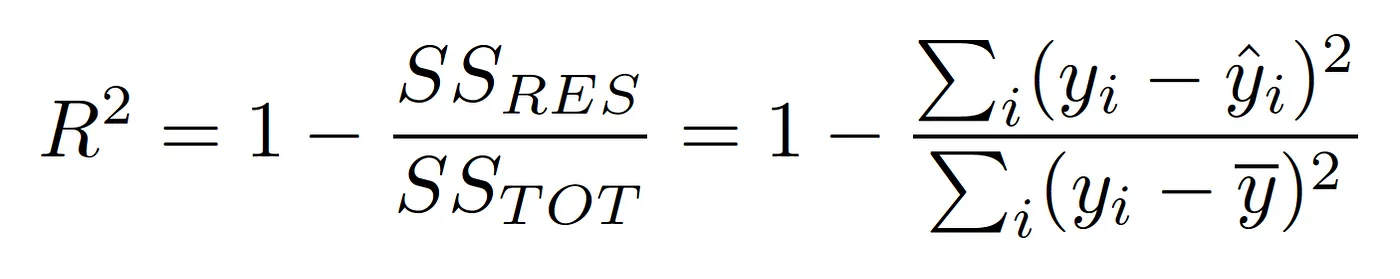

### MEAN ABSOLUTE ERROR
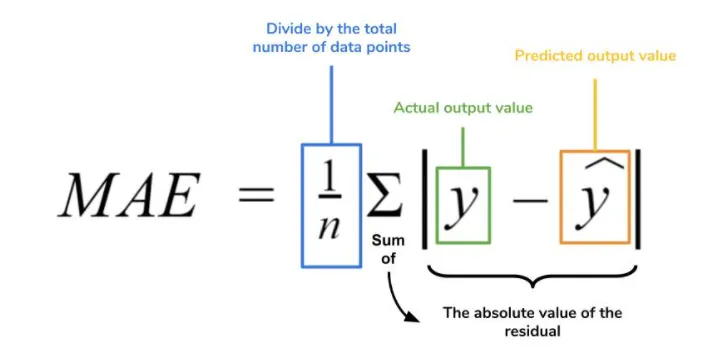

### ROOT MEAN SQUARED ERROR
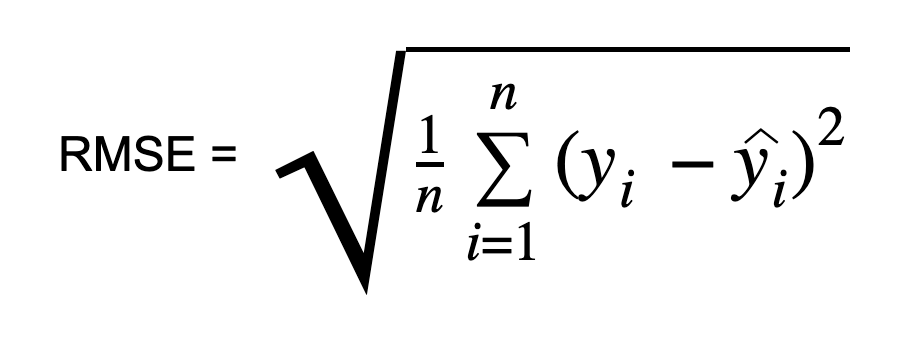

### Evaluation time
Let's see how does both of our models perform.

In [890]:


class evaluate:
    def __init__(self, y_pred, y_test):
        self.y_pred = np.array(y_pred)
        self.y_test = np.array(y_test)

    def r2score(self):
        num_sum = np.sum((self.y_test - self.y_pred)**2 )
        den_sum = np.sum((self.y_pred - self.y_pred.mean()) **2)
        return 1 - (num_sum / den_sum)

    def mae(self):
        num = np.sum(np.abs(self.y_test - self.y_pred))
        return num / len(self.y_test)

    def rmse(self):
        num1 = np.sqrt(np.sum((self.y_test - self.y_pred) ** 2) / len(self.y_pred))
        return num1


In [891]:
# First calculate all the metrics for olslr_pred
ols_eval=evaluate(olslr_pred,y_test)


In [892]:
ols_eval.r2score()

0.27537877971128055

In [893]:
ols_eval.mae()

0.594058115101429

In [894]:
ols_eval.rmse()

0.7555620763752291

In [895]:
# Now for gdlr_pred

In [896]:
gdls_eval=evaluate(gdlr_pred,y_test)

In [897]:
gdls_eval.r2score()

0.27537877971128266

In [898]:
gdls_eval.mae()

0.5940581151014304

In [899]:
gdls_eval.rmse()

0.7555620763752308

In [900]:
from sklearn.metrics import r2_score

In [901]:
olsr2=r2_score(olslr_pred,y_test)
olsr2

0.27537877971128055

In [902]:
gdlsr2=r2_score(gdlr_pred,y_test)
gdlsr2

0.27537877971128266

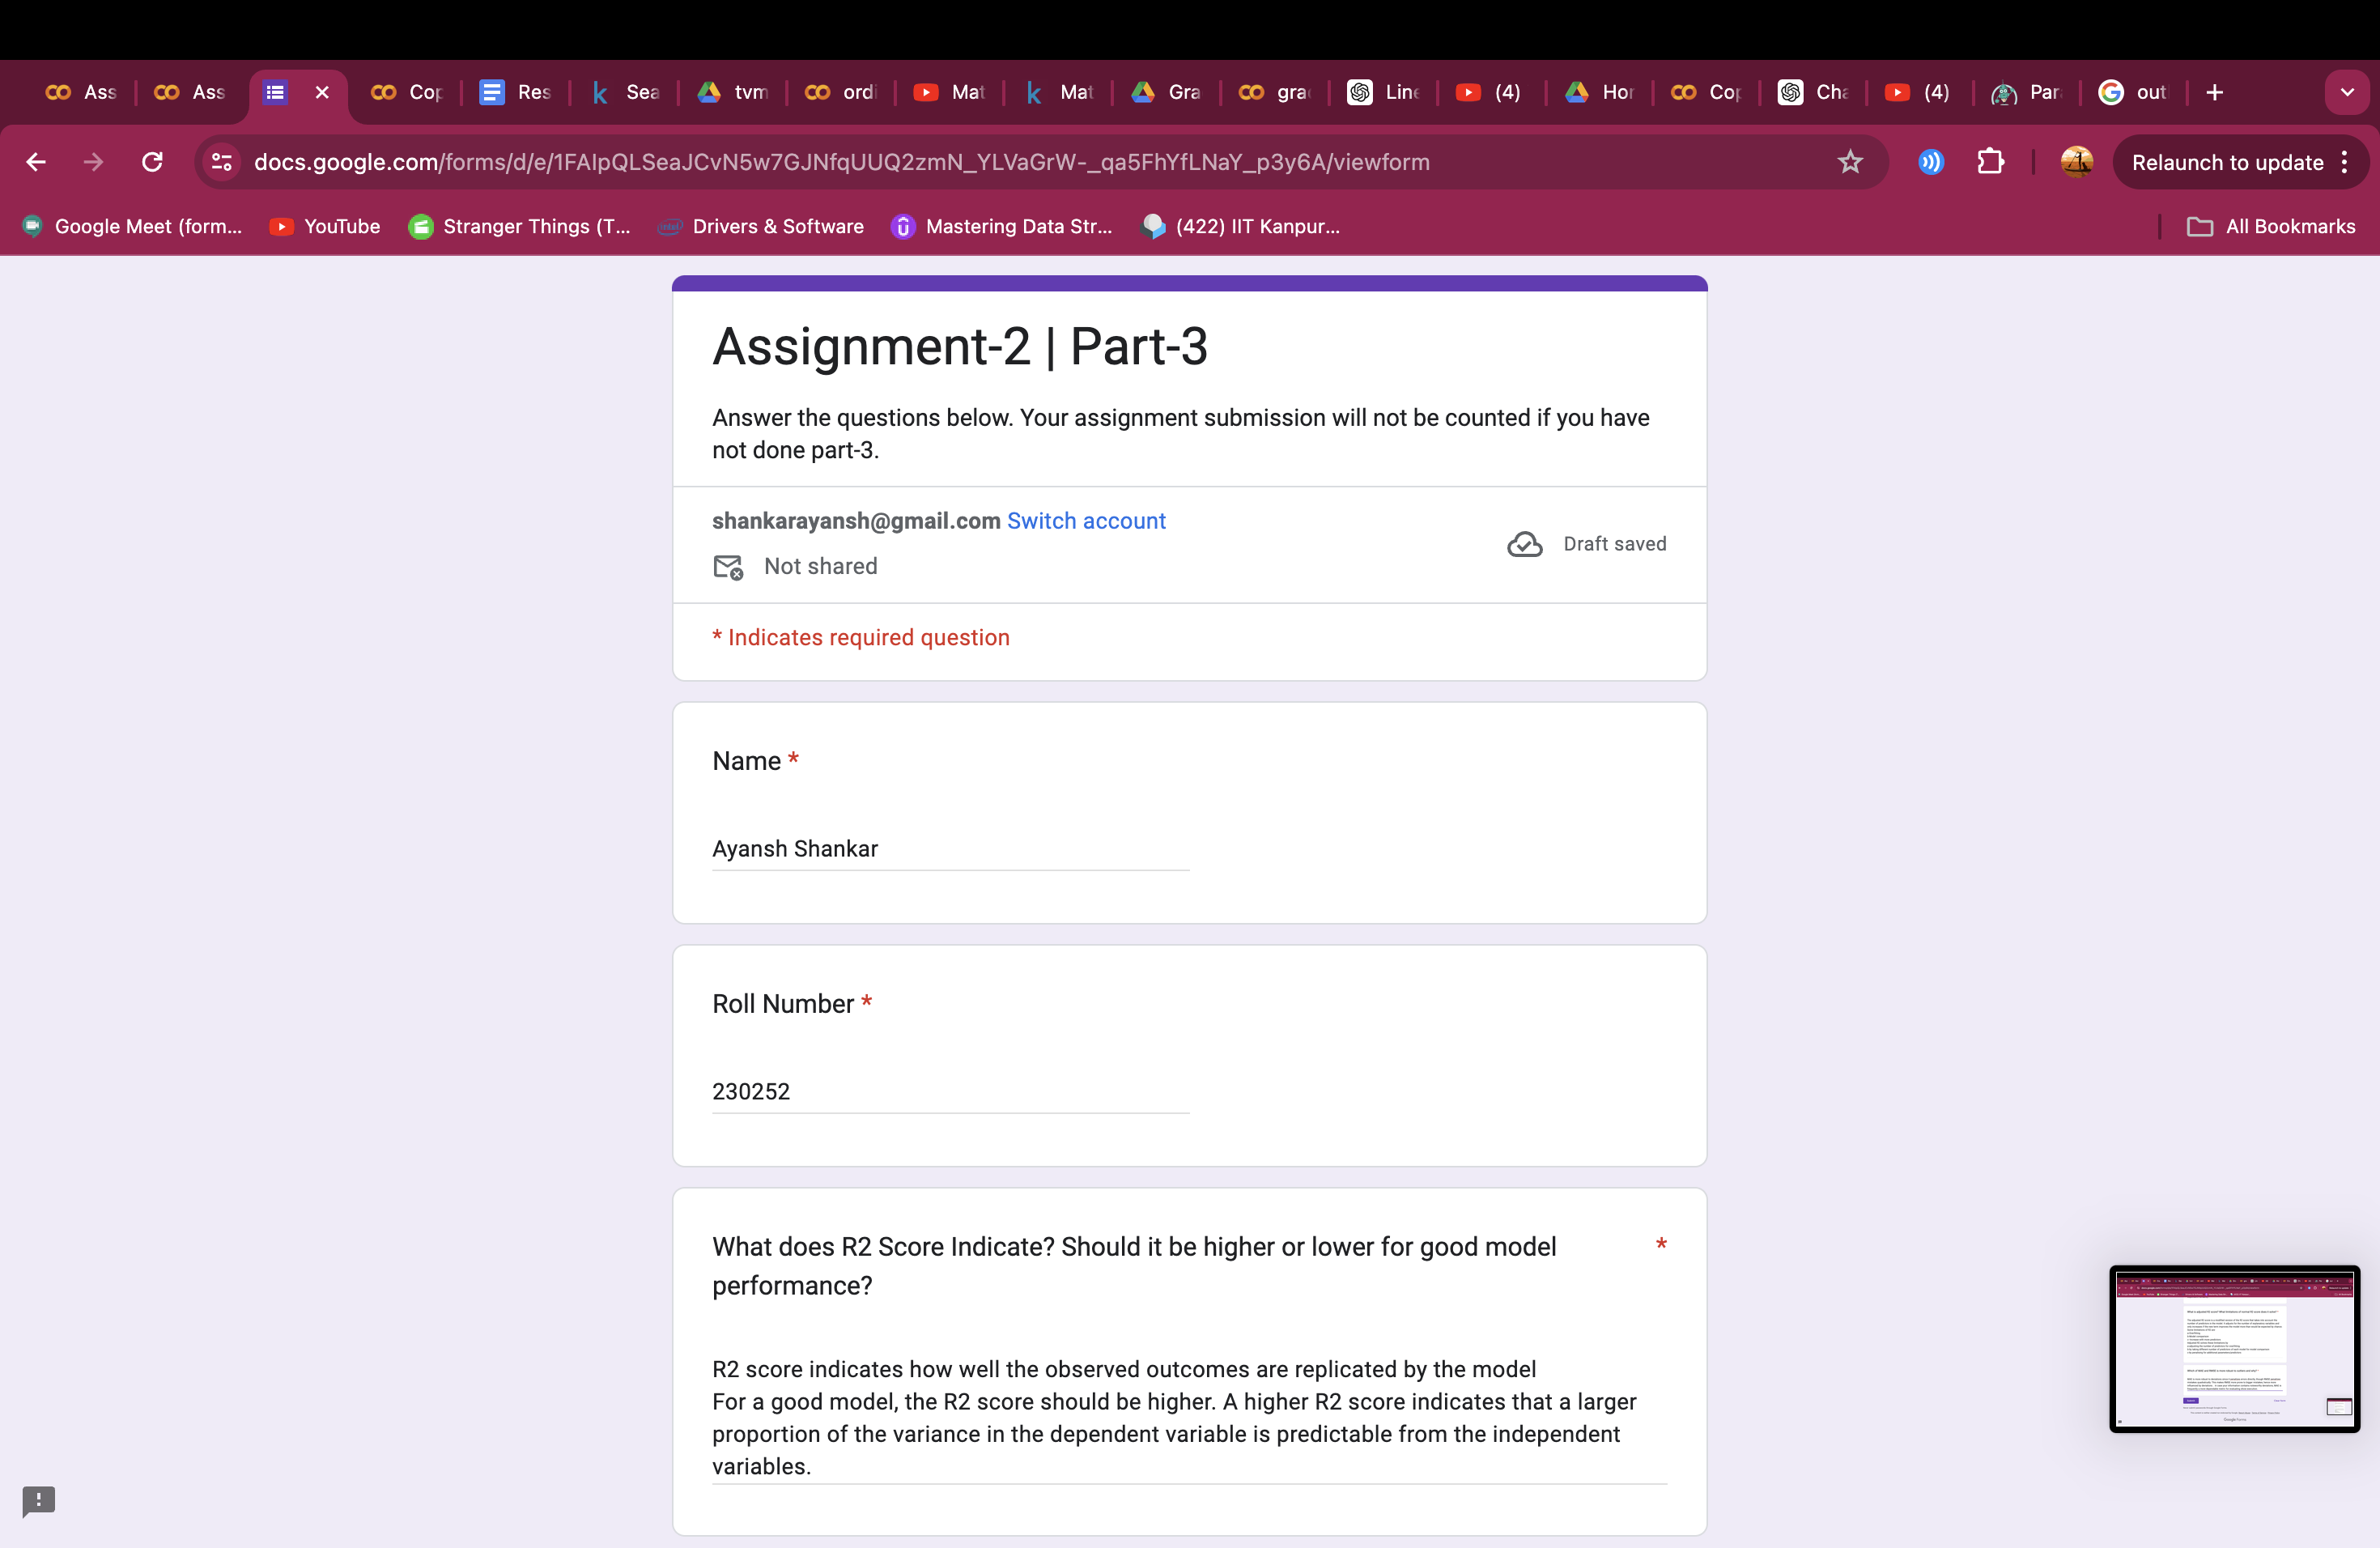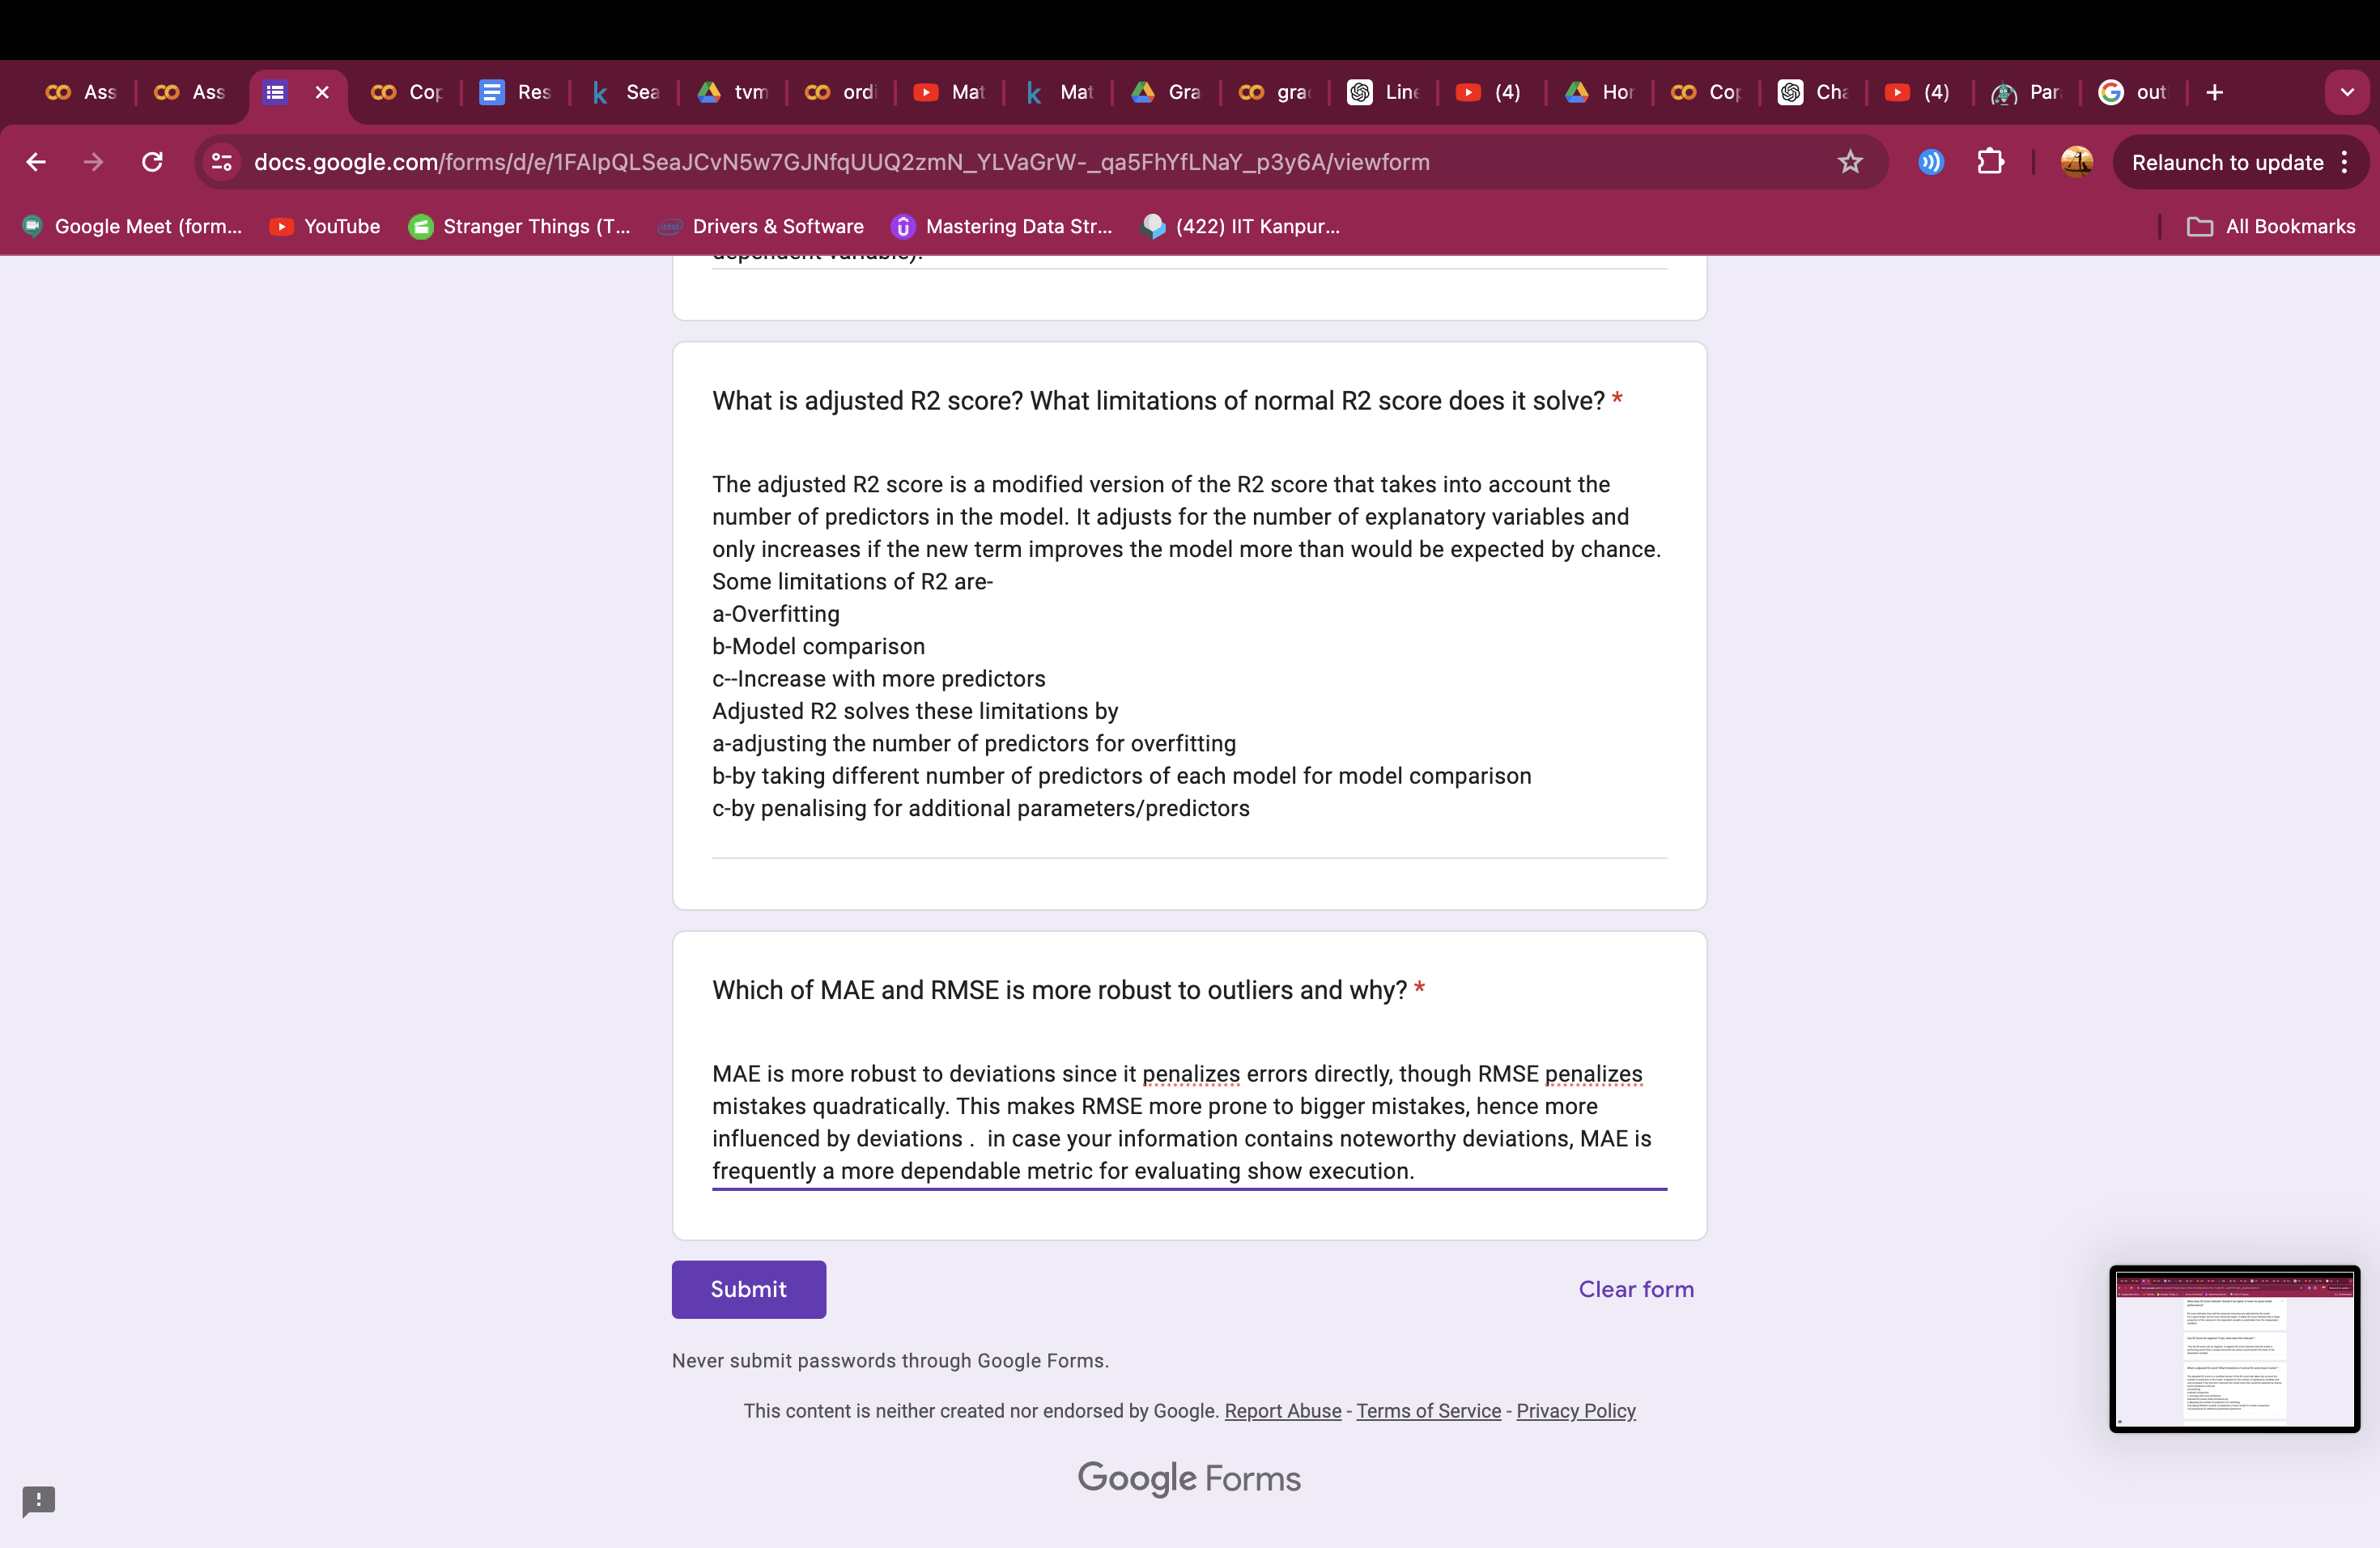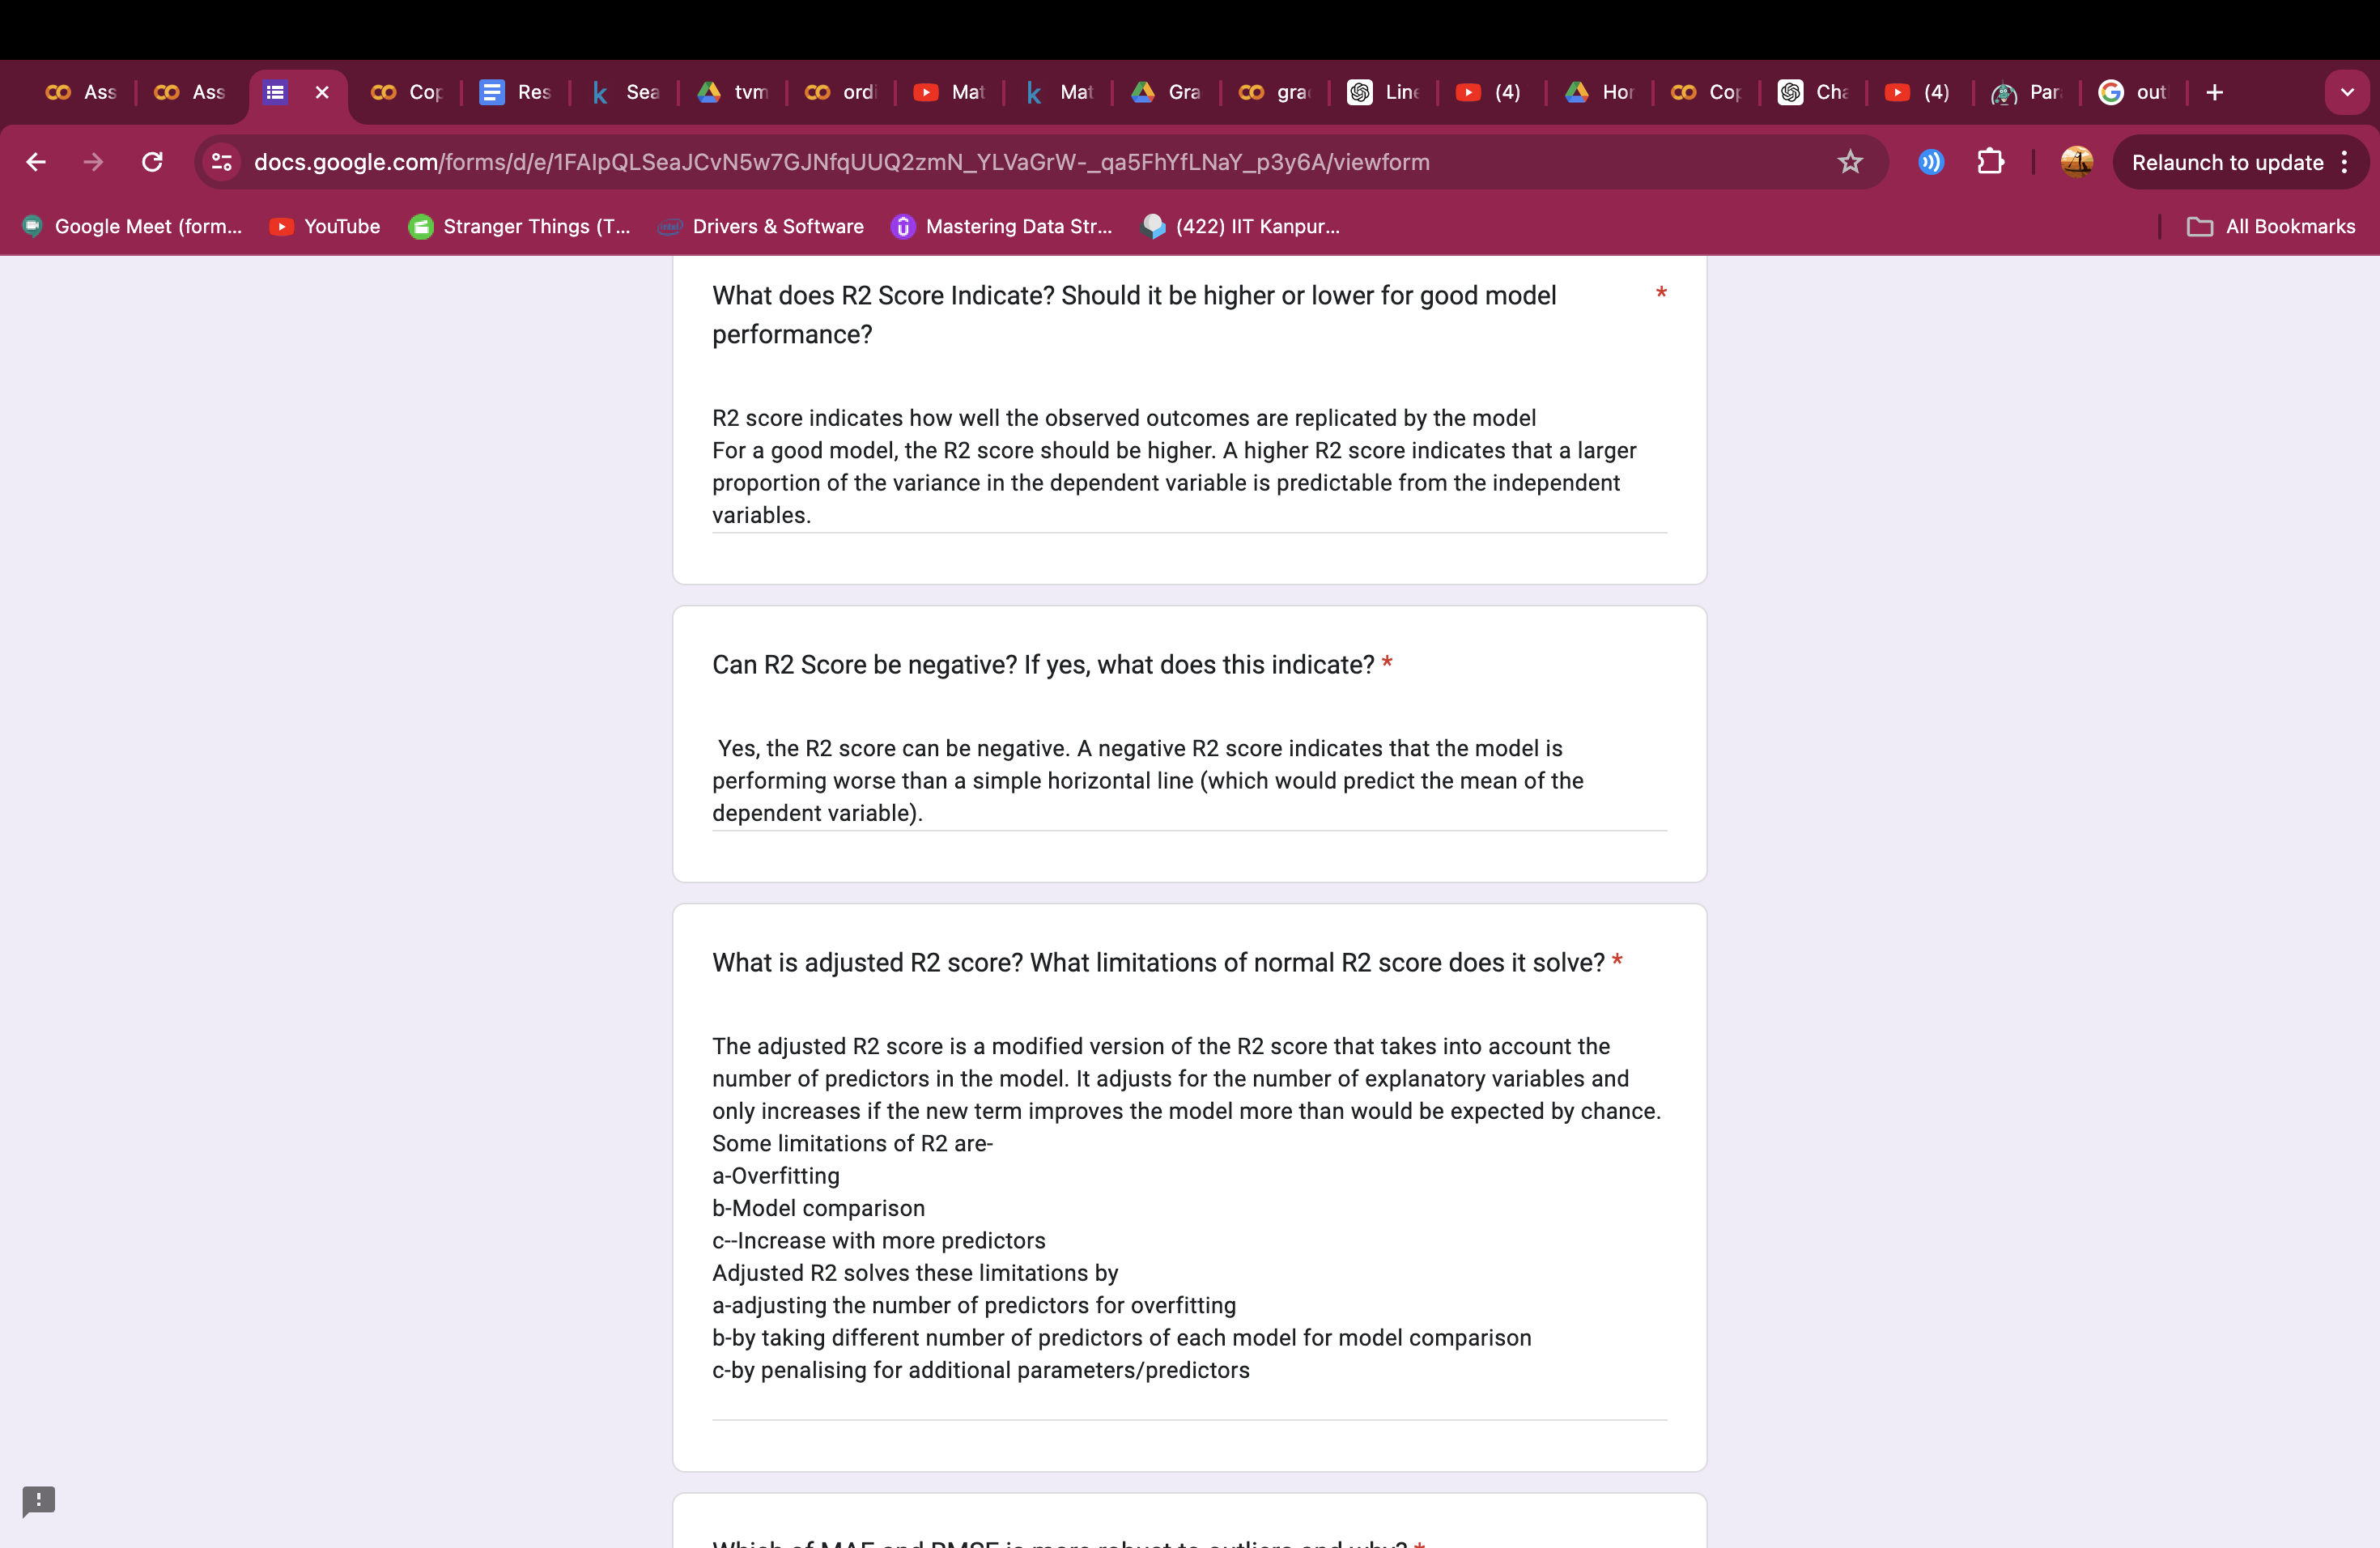# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!

